In [37]:
import torch
import numpy as np
import sys, os
os.environ['OCEANDATA'] = '/Volumes/LoCe/oceandata/'

sys.path.append('../')
from configs.base_config import TrainingConfig
from utils import get_dataloader, TransformFields
import matplotlib.pyplot as plt
import einops
from torch.nn.functional import interpolate
import matplotlib as mpl

from tqdm import tqdm
mpl.rcParams['image.origin'] = 'lower'

In [2]:
# Original path : /gpfswork/rech/omr/udu91zn/diffusionmodels/diffModel_experiences/z87envpm
base_path= '/Volumes/LoCe/oceandata/models/dino-fusion/' #'/Users/emeunier/Documents/scai/'
training_tar = ''
config = TrainingConfig()

In [3]:
train_dataloader = get_dataloader(config.data_file, batch_size=config.train_batch_size, fields=config.fields, transform=False, shuffle=False)
idt = iter(train_dataloader)
batch = next(idt)

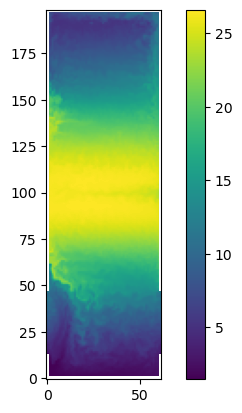

In [55]:
plt.imshow(batch['toce.npy'][0, 0])
plt.colorbar()

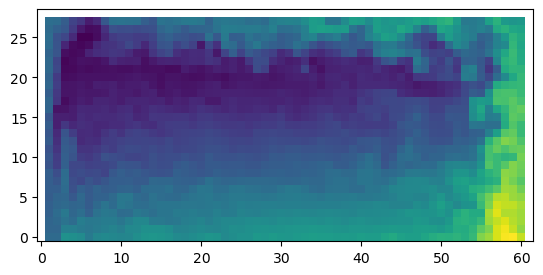

In [26]:
plt.imshow(batch['toce.npy'][0, 0, 170:205, :])

tensor([6.4570, 6.4727, 6.4896, 6.4966, 6.5106, 6.5151, 6.5108, 6.4914])

In [ ]:
areas = {'south' : slice(5, 40), 'north' : slice(170, 205)}
toce_avg = {'south' : [], 'north' : []}


iters = []
for b in tqdm(train_dataloader) :
    iters.extend([b['__key__']])
    for a in areas.keys() :
        toce_avg[a].append(b['toce.npy'][:, 0, areas[a], :].nanmean(axis=(1,2)))

toce_avg['south'] = torch.concat(toce_avg['south'])
toce_avg['north'] = torch.concat(toce_avg['north'])

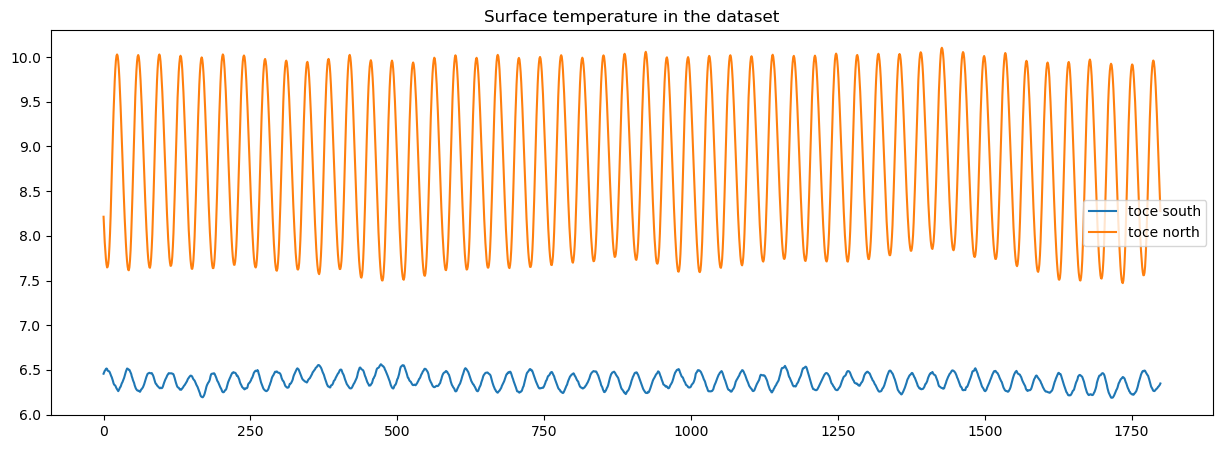

In [52]:
plt.figure(figsize=(15,5))
plt.title('Surface temperature in the dataset')
plt.plot(toce_avg['south'], label='toce south')
plt.plot(toce_avg['north'], label='toce north')
plt.legend()

In [57]:
import seaborn as sns

In [ ]:
sns.boxplot(toce_avg,)